In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
matplotlib.rcParams['figure.figsize'] = (25, 15)


In [4]:
dtp = pd.read_csv('https://raw.githubusercontent.com/MarkOnegov/mvd.ru-opendata/main//dtp-grouped.csv')
factors = pd.read_csv('https://raw.githubusercontent.com/MarkOnegov/mvd.ru-opendata/main//dtp-groups.csv', index_col=0)
get_date = lambda row: pd.Timestamp(f'{row["year"]}-{row["end_mounth"]}')
dtp['date'] = dtp.apply(get_date,axis=1)

In [5]:
scaler = MinMaxScaler()

def plot_factor(data:pd.DataFrame,factor_names:pd.DataFrame, subject:str, factors,*, factor_prefix='per_mounth_',use_scaler=False):
    fig, ax = plt.subplots()
    data = data[data['subject']==subject]
    for factor in factors:
        data = data[data[factor_prefix+factor].notna()]
        if use_scaler:
            data[[factor_prefix+factor]] = scaler.fit_transform(data[[factor_prefix+factor]])
    data.plot(x='date',y=list(map(lambda f: factor_prefix+f,factors)), ax=ax)
    ax.legend(factor_names.loc[factors]['factor_name'].values)

def plot_factor_all(data:pd.DataFrame,factor_names:pd.DataFrame, subject:str, factors,*, factor_prefix='per_mounth_'):
    plot_factor(data,factor_names,subject,factors,factor_prefix=factor_prefix)
    plot_factor(data,factor_names,subject,factors,factor_prefix=factor_prefix,use_scaler=True)

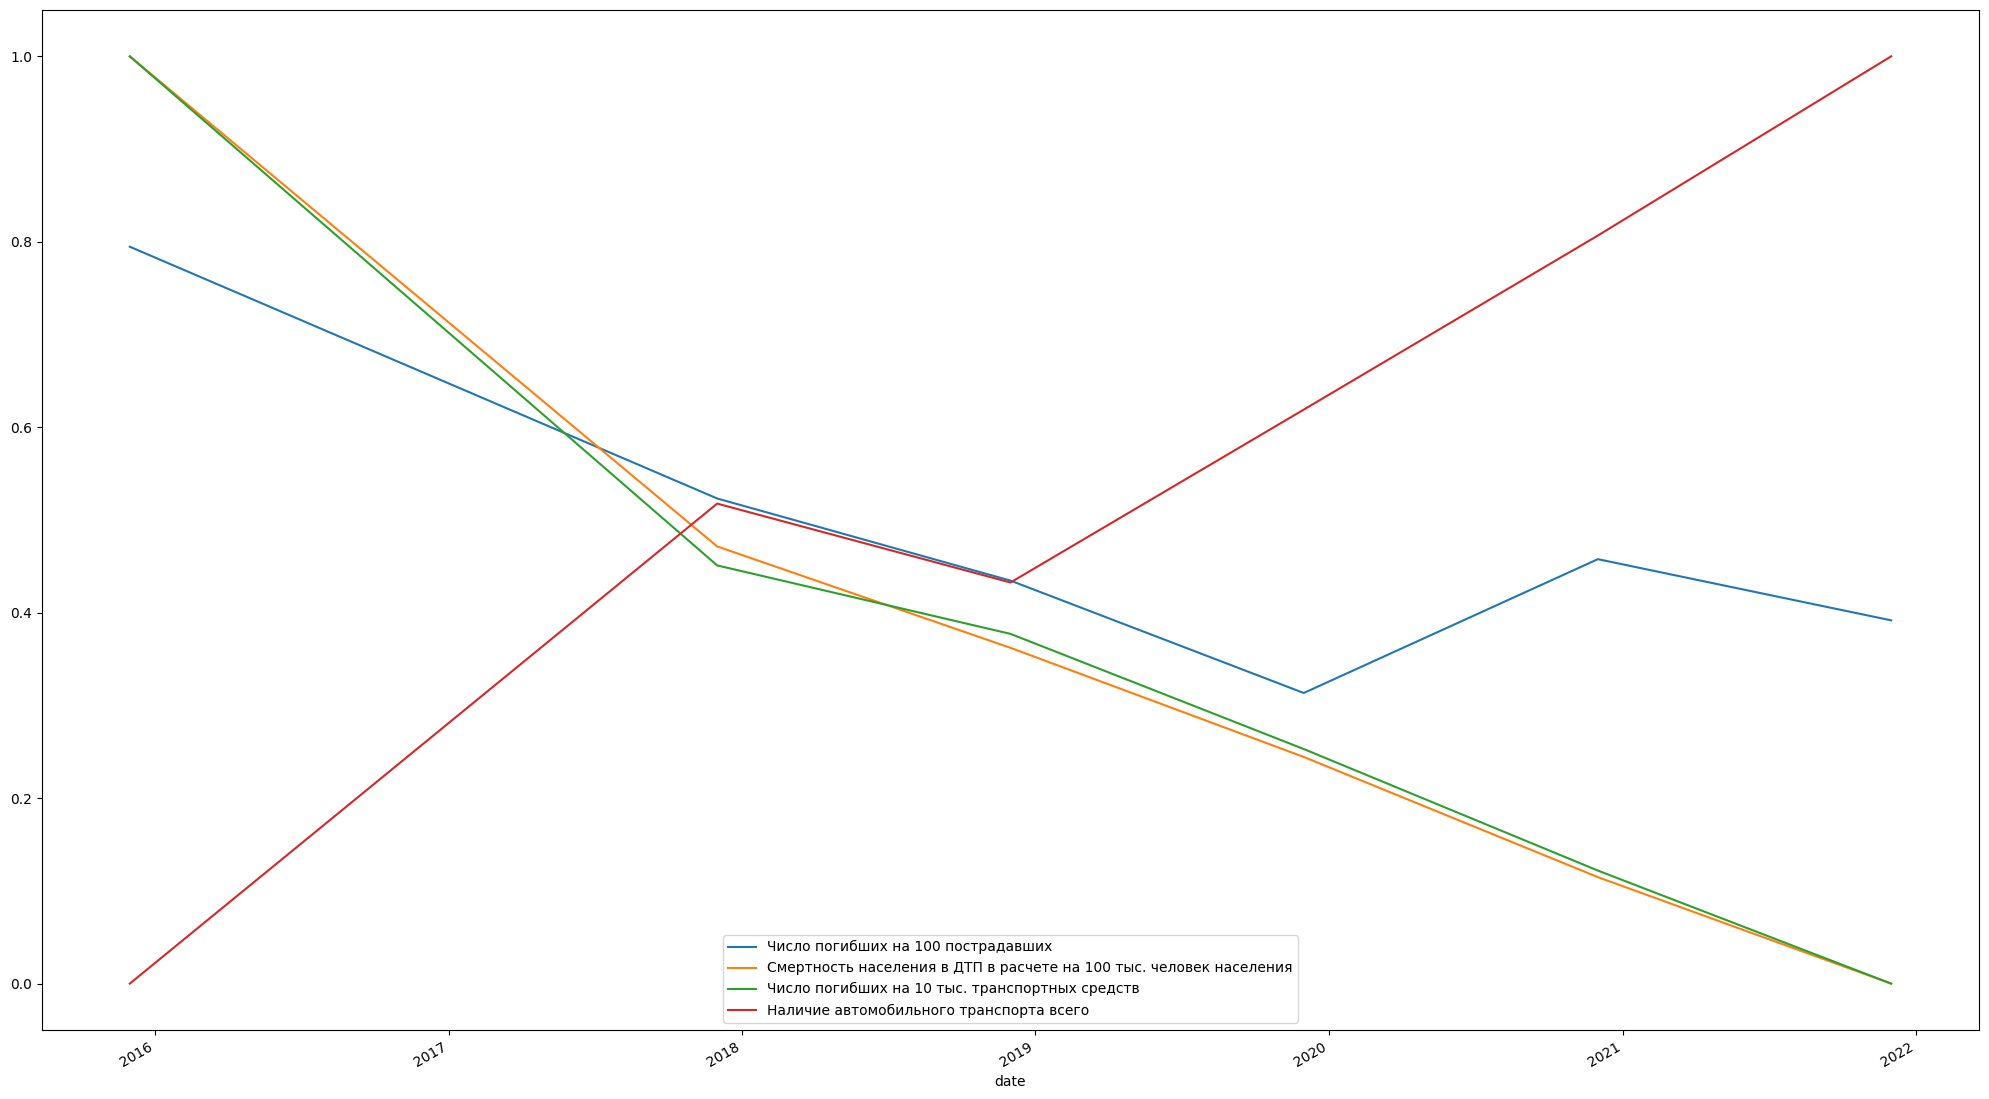

In [12]:
plot_factor(dtp,factors,'Центральный фед.округ',['factor_4','factor_5','factor_6','factor_7'], factor_prefix="", use_scaler=True)